In [ ]:
#Partners: Jules Dowling and Garren Kalter

In [ ]:
#might want to use split function to cut off log at some points

Questions: 
1. Load the log file provided into a Pandas Time series.   Almost every line in this file begins with a timestamp, but a couple don't, so you'll have to figure out how to deal with that.  The data in your series should be the string following, but not including, the [XXXX.YYYY] portion, which describes various things happening.
2. Are all the timestamps unique?  What's the resolution of each timestamp?
3. How many "Initializing Daemon" events are there?  How many "Installing new Application" events?
4. What are the earliest and latest timestamps in this log?  How many days does that period represent?
5. Group all the events by the hour of each day and count the events in each hour - make a bar plot with 24 bars representing these counts.
6. Do the same thing with days of the week (so now you'll have 7 bars) - note that the book doesn't say how to do this, so you'll have to poke around a bit.
7. Roughly how often does this daemon get initialized?  

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#converting to csv
uploaded = pd.read_csv('Daemon.log')
uploaded.columns = ["log"]
uploaded

,log
0,2020-02-06 17:52:36.221 StandaloneUpdaterDaemo...
1,2020-02-06 17:52:36.223 StandaloneUpdaterDaemo...
2,2020-02-06 17:52:36.223 StandaloneUpdaterDaemo...
3,2020-02-06 17:52:36.228 StandaloneUpdaterDaemo...
4,2020-02-06 17:52:36.282 StandaloneUpdaterDaemo...
...,...
6741,2022-04-13 01:29:51.932 StandaloneUpdaterDaemo...
6742,2022-04-13 01:29:51.932 StandaloneUpdaterDaemo...
6743,2022-04-13 01:29:51.932 StandaloneUpdaterDaemo...
6744,2022-04-13 01:29:51.976 StandaloneUpdaterDaemo...


In [15]:
#split into  columns
df = uploaded["log"].str.split(" ", 3, expand = True)
df

#After some tinkering and per instructions in moodle process non time stamped data
#since we know what the error (No process to signal.) and that it only occurs twice was we will remove it
df = df.drop(index = [3902, 3866])

#Clean Up
df.columns = ("date","time", "stamp", "type")
df = df.assign(stamp='StandaloneUpdaterDaemon')
df


,date,time,stamp,type
0,2020-02-06,17:52:36.221,StandaloneUpdaterDaemon,Validating connection
1,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon,Got Attributes
2,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon,"identifier ""com.microsoft.OneDriveStandaloneUp..."
3,2020-02-06,17:52:36.228,StandaloneUpdaterDaemon,Got requirement
4,2020-02-06,17:52:36.282,StandaloneUpdaterDaemon,Got validated
...,...,...,...,...
6741,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon,Got Attributes
6742,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon,"identifier ""com.microsoft.OneDriveStandaloneUp..."
6743,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon,Got requirement
6744,2022-04-13,01:29:51.976,StandaloneUpdaterDaemon,Got validated


Are all the timestamps unique? What's the resolution of each timestamp?

 


**The resolution of the time stamps are to the nearest millisecond (1/1000th of a second). Observationally one can see that not all time stamps are unique. Look at 6741-6743 for example.** 

How many "Initializing Daemon" events are there? How many "Installing new Application" events?
[ ]
 


In [ ]:
#There are 56 Initializing Daemon events and there are 25 Installing new Application
IDaemon= df.groupby('type').count()
IDaemon

,date,time,stamp
type,,,
Application path /Applications/OneDrive.app is locked,1,1,1
Application path /Applications/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater02D74B31/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater33E7B11B/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater34728E1C/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater389AF409/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater38E161EF/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater39C09E32/OneDrive.app is unlocked,1,1,1
Application path /var/folders/1w/hcqb0vpj59s_rzn19zvr7jy87k1kxc/T/OneDriveUpdater39C50615/OneDrive.app is unlocked,1,1,1


What are the earliest and latest timestamps in this log? How many days does that period represent?


In [ ]:
df.sort_values(by='date')
#The earliest entry is on February 6th, 2020 at 5:52:36.221 pm
#The latest entry is on April 13th, 2022 at 1:29::51.976 am

,date,time,stamp,type
0,2020-02-06,17:52:36.221,StandaloneUpdaterDaemon[94475:1522853],Validating connection
24,2020-02-06,17:52:51.339,StandaloneUpdaterDaemon[94475:1522853],Running stop command Deamon
23,2020-02-06,17:52:51.339,StandaloneUpdaterDaemon[94475:1522853],Stopping Deamon
22,2020-02-06,17:52:51.320,StandaloneUpdaterDaemon[94475:1522853],Application path /Applications/OneDrive.app is...
21,2020-02-06,17:52:50.192,StandaloneUpdaterDaemon[94475:1522853],Got validated
...,...,...,...,...
6733,2022-04-13,01:29:51.826,StandaloneUpdaterDaemon[908:16174242],Got Attributes
6732,2022-04-13,01:29:51.818,StandaloneUpdaterDaemon[908:16174242],Validating connection
6744,2022-04-13,01:29:51.976,StandaloneUpdaterDaemon[908:16174242],Got validated
6737,2022-04-13,01:29:51.888,StandaloneUpdaterDaemon[908:16174242],Got Attributes


In [ ]:
#Total days in period are 798 days
pd.date_range('2020-02-06', '2022-04-13')

DatetimeIndex(['2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15',
               ...
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13'],
              dtype='datetime64[ns]', length=798, freq='D')

Group all the events by the hour of each day and count the events in each hour - make a bar plot with 24 bars representing these counts.



In [ ]:
hour = []
hour = df.time.str[:2]
df = df.assign(hour = hour)
df

,date,time,stamp,type,hour
0,2020-02-06,17:52:36.221,StandaloneUpdaterDaemon[94475:1522853],Validating connection,17
1,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],Got Attributes,17
2,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],"identifier ""com.microsoft.OneDriveStandaloneUp...",17
3,2020-02-06,17:52:36.228,StandaloneUpdaterDaemon[94475:1522853],Got requirement,17
4,2020-02-06,17:52:36.282,StandaloneUpdaterDaemon[94475:1522853],Got validated,17
...,...,...,...,...,...
6741,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got Attributes,01
6742,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],"identifier ""com.microsoft.OneDriveStandaloneUp...",01
6743,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got requirement,01
6744,2022-04-13,01:29:51.976,StandaloneUpdaterDaemon[908:16174242],Got validated,01


In [ ]:
stamp_count = df.groupby(df['hour']).count()
stamp_count

,date,time,stamp,type
hour,,,,
00,100,100,100,100
01,191,191,191,191
02,112,112,112,112
03,57,57,57,57
04,141,141,141,141
05,140,140,140,140
06,56,56,56,56
07,183,183,183,183
08,183,183,183,183


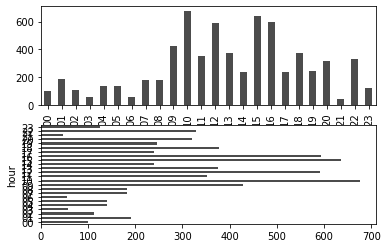

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(stamp_count['stamp'])
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

 
Do the same thing with days of the week (so now you'll have 7 bars) - note that the book doesn't say how to do this, so you'll have to poke around a bit. Roughly how often does this daemon get initialized

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,date,time,stamp,type,hour
0,2020-02-06,17:52:36.221,StandaloneUpdaterDaemon[94475:1522853],Validating connection,17
1,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],Got Attributes,17
2,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],"identifier ""com.microsoft.OneDriveStandaloneUp...",17
3,2020-02-06,17:52:36.228,StandaloneUpdaterDaemon[94475:1522853],Got requirement,17
4,2020-02-06,17:52:36.282,StandaloneUpdaterDaemon[94475:1522853],Got validated,17
...,...,...,...,...,...
6741,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got Attributes,01
6742,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],"identifier ""com.microsoft.OneDriveStandaloneUp...",01
6743,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got requirement,01
6744,2022-04-13,01:29:51.976,StandaloneUpdaterDaemon[908:16174242],Got validated,01


In [ ]:
df['week']=df['date'].dt.day_name()
df

,date,time,stamp,type,hour,week
0,2020-02-06,17:52:36.221,StandaloneUpdaterDaemon[94475:1522853],Validating connection,17,Thursday
1,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],Got Attributes,17,Thursday
2,2020-02-06,17:52:36.223,StandaloneUpdaterDaemon[94475:1522853],"identifier ""com.microsoft.OneDriveStandaloneUp...",17,Thursday
3,2020-02-06,17:52:36.228,StandaloneUpdaterDaemon[94475:1522853],Got requirement,17,Thursday
4,2020-02-06,17:52:36.282,StandaloneUpdaterDaemon[94475:1522853],Got validated,17,Thursday
...,...,...,...,...,...,...
6741,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got Attributes,01,Wednesday
6742,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],"identifier ""com.microsoft.OneDriveStandaloneUp...",01,Wednesday
6743,2022-04-13,01:29:51.932,StandaloneUpdaterDaemon[908:16174242],Got requirement,01,Wednesday
6744,2022-04-13,01:29:51.976,StandaloneUpdaterDaemon[908:16174242],Got validated,01,Wednesday


In [ ]:
df_week = df.groupby(df['week']).count()
df_week

,date,time,stamp,type,hour
week,,,,,
Friday,966,966,966,966,966
Monday,941,941,941,941,941
Saturday,1126,1126,1126,1126,1126
Sunday,954,954,954,954,954
Thursday,965,965,965,965,965
Tuesday,794,794,794,794,794
Wednesday,998,998,998,998,998


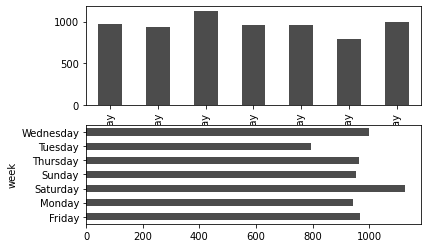

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(df_week['stamp'])
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Roughly how often does this daemon get initialized?

In [ ]:
#The rate of occurrence per month is 2-3 times a month so roughly a cadence of every other week to 10 days
InitDae= df[df['type'] == 'Initializing Daemon']
InitDae['Year'] = pd.DatetimeIndex(InitDae['date']).year
InitDae['Month'] = pd.DatetimeIndex(InitDae['date']).month
InitDae.groupby(['Year', 'Month']).size()


Year  Month
2020  2        2
      3        1
      4        3
      5        3
      6        2
      7        1
      8        3
      9        2
      10       5
      11       1
      12       2
2021  1        3
      3        2
      4        3
      5        3
      6        1
      7        5
      8        4
      9        4
      10       2
      11       1
      12       1
2022  2        1
      3        1
dtype: int64